<h1> Overview: </h1>
<h2> Questions: </h2>

- Most used chatwheel type <b>~71</b>

- What chatwheel option wins the most games <b>~71</b>

- Do teams that chat more win more games. Compare lots of chat with little chat <b>~slightly more</b>

- Do teams that chat win faster than those with little chat 

- Do more chatwheel win faster

- Does chat increase or decrease as the rank increases

- Does chatwheel increase or decrease as the rank increases 

- Plot chat distribution through time - <b>Done</b>

<h1> Imports </h1>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy import stats
from scipy.special import boxcox1p
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn

pd.set_option("display.float_format", lambda x: "{:.3f}".format(x)) #Limiting floats output to 3 decimal points
pd.set_option("display.max_columns", None)

<h1>Load Data</h1>

In [2]:
dm_data = pd.read_json("../Data/merged_matches_with_chat.json")
dm_data.head()

,match_id,barracks_status_dire,barracks_status_radiant,chat,cluster,cosmetics,dire_score,dire_team_id,draft_timings,duration,engine,first_blood_time,game_mode,human_players,leagueid,lobby_type,match_seq_num,negative_votes,objectives,picks_bans,positive_votes,radiant_gold_adv,radiant_score,radiant_team_id,radiant_win,radiant_xp_adv,skill,teamfights,tower_status_dire,tower_status_radiant,version,replay_salt,series_id,series_type,players,patch,region,replay_url,all_word_counts,my_word_counts,throw,loss,comeback,stomp,league,radiant_team,dire_team,chat_count,start_time,avg_mmr,num_mmr,avg_rank_tier,num_rank_tier
0,6807355417,0,63,"[{'time': -83, 'type': 'chatwheel', 'key': '14...",273,"{'647': 0, '4009': 131, '4022': 131, '4023': 1...",28,NaN,"[{'order': 1, 'pick': False, 'active_team': 2,...",2264,1,100,22,10,0,0,5700223580,0,"[{'time': 100, 'type': 'CHAT_MESSAGE_FIRSTBLOO...","[{'is_pick': True, 'hero_id': 31, 'team': 0, '...",0,"[0, 72, 432, 277, 116, 681, 463, 601, 961, 143...",44,NaN,True,"[0, 137, 265, 304, 319, 824, 259, 694, 736, 10...",NaN,"[{'start': 573, 'end': 615, 'last_death': 600,...",0,1974,21,897833634,0,0,"[{'match_id': 6807355417, 'player_slot': 0, 'a...",51,3,http://replay273.valve.net/570/6807355417_8978...,"{'sorry': 3, 'pugnas': 1, 'model': 1, 'didnt':...",{},0.000,12337.000,NaN,NaN,None,None,None,31,2022-10-15 19:16:52,2941.000,3.000,34,8
1,6807356900,63,51,"[{'time': -71, 'type': 'chatwheel', 'key': '86...",186,"{'647': 131, '4870': 1, '6141': 4, '6142': 4, ...",52,NaN,"[{'order': 1, 'pick': False, 'active_team': 2,...",1945,1,18,22,10,0,7,5700212897,0,"[{'time': 653, 'type': 'building_kill', 'unit'...","[{'is_pick': True, 'hero_id': 97, 'team': 1, '...",0,"[12, -224, -82, -353, -390, -195, -670, -1215,...",16,NaN,False,"[0, 169, 56, -101, -65, 159, -39, -784, -440, ...",NaN,"[{'start': 401, 'end': 440, 'last_death': 425,...",1974,391,21,1289242017,0,0,"[{'match_id': 6807356900, 'player_slot': 0, 'a...",51,8,http://replay186.valve.net/570/6807356900_1289...,{},{},NaN,NaN,369.000,19030.000,None,None,None,0,2022-10-15 19:17:53,2996.000,2.000,32,7
2,6807357403,51,63,"[{'time': -849, 'type': 'chatwheel', 'key': '4...",192,"{'647': 131, '4991': 130, '5090': 0, '7125': 0...",31,8851608.000,"[{'order': 1, 'pick': False, 'active_team': 3,...",2215,1,126,2,10,0,9,5700244648,0,"[{'time': 125, 'type': 'CHAT_MESSAGE_COURIER_L...","[{'is_pick': False, 'hero_id': 66, 'team': 1, ...",0,"[0, 154, 108, 1080, 791, 799, 1354, 167, -583,...",50,8852695.000,True,"[0, 279, 324, 1062, 1027, 1230, 1292, 638, -15...",NaN,"[{'start': 280, 'end': 328, 'last_death': 313,...",388,1846,21,229078240,0,0,"[{'match_id': 6807357403, 'player_slot': 0, 'a...",51,9,http://replay192.valve.net/570/6807357403_2290...,"{'mins': 1, 'brb': 1, 'хочешь': 2, 'ofc': 1, '...",{},6096.000,7008.000,NaN,NaN,None,None,None,51,2022-10-15 19:18:19,5687.000,5.000,81,7
3,6807620917,63,51,"[{'time': 357, 'type': 'chatwheel', 'key': '71...",273,"{'647': 0, '4692': 3, '6154': 3, '6158': 3, '7...",36,NaN,"[{'order': 1, 'pick': False, 'active_team': 2,...",2331,1,0,22,10,0,0,5700459724,0,"[{'time': -13, 'type': 'CHAT_MESSAGE_FIRSTBLOO...","[{'is_pick': True, 'hero_id': 64, 'team': 0, '...",0,"[134, 175, 574, 570, 286, 1154, 1861, 2477, 23...",43,NaN,False,"[-2, 186, 373, 497, 715, 1016, 1588, 2173, 230...",NaN,"[{'start': 719, 'end': 760, 'last_death': 745,...",1830,390,21,393277211,0,0,"[{'match_id': 6807620917, 'player_slot': 0, 'a...",51,3,http://replay273.valve.net/570/6807620917_3932...,"{'gg': 3, 'wow': 1, 'wp': 1}",{},NaN,NaN,8783.000,2663.000,None,None,None,3,2022-10-15 23:25:15,2418.000,1.000,32,4
4,6807359513,16,63,"[{'time': -74, 'type': 'chatwheel', 'key': '75...",187,"{'647': 3, '684': 131, '4064': 4, '4159': 4, '...",28,NaN,"[{'order': 1, 'pick': False, 'active_team': 2,...",2226,1,151,22,10,0,7,5700221651,0,"[{'time': 152, 'type': 'CHAT_MESSAGE_FIRSTBLOO...","[{'is_pick': True, 'hero_id': 53, 'team': 0, '...",0,"[0, -2, 1, 244, 92, 134, 416, 1086, 599

## Notable Features
- Match_id: This tells us which game everything belongs to. Will be the primary key to a lot of analysis.
- Chat: Shows all in-game communication between players.
- Duration: Tells us how long a game went on for.
- First_blood_time: Tells us when the first kill of the game happened.
- Human_players: Tells us how many people are playing the game.
- Radiant_win: Tells us if the radiant side wins.
- All_word_counts: Gives a summary of the words that were said and how many times
- Chat_count: Gives us how many messages were sent in the game.
- Avg_mmr: Gives us the ranking of the game

# EDA
## Describe

In [3]:
dm_data.describe()

,match_id,barracks_status_dire,barracks_status_radiant,cluster,dire_score,dire_team_id,duration,engine,first_blood_time,game_mode,human_players,leagueid,lobby_type,match_seq_num,negative_votes,positive_votes,radiant_score,radiant_team_id,skill,tower_status_dire,tower_status_radiant,version,replay_salt,series_id,series_type,patch,region,throw,loss,comeback,stomp,chat_count,avg_mmr,num_mmr,avg_rank_tier,num_rank_tier
count,1111.000,1111.000,1111.000,1111.000,1111.000,45.000,1111.000,1111.000,1111.000,1111.000,1111.000,1111.000,1111.000,1111.000,1111.000,1111.000,1111.000,46.000,0.000,1111.000,1111.000,1111.000,1111.000,1111.000,1111.000,1111.000,1111.000,538.000,538.000,573.000,573.000,1111.000,919.000,919.000,1111.000,1111.000
mean,6806569698.536,41.068,37.138,197.392,38.859,7291102.533,2465.874,1.000,101.282,19.837,10.000,538.970,4.109,5699524494.288,0.000,0.000,37.966,7354408.870,NaN,1066.623,982.371,21.000,1058708846.906,26349.041,0.035,51.000,6.207,3671.502,18010.286,2775.436,21392.792,12.015,3687.256,2.679,48.741,5.458
std,1157718.074,26.767,28.428,55.233,15.551,2706414.305,679.050,0.000,96.454,6.032,0.000,2721.607,3.425,1036915.524,0.000,0.000,15.527,2676240.659,NaN,909.132,920.430,0.000,616184834.795,134666.738,0.184,0.000,4.668,5446.974,8995.142,4005.697,9240.169,20.332,1495.704,1.743,20.680,2.006
min,6804735400.000,0.000,0.000,117.000,0.000,39.000,400.000,1.000,0.000,2.000,10.000,0.000,0.000,5697880838.000,0.000,0.000,0.000,15.000,NaN,0.000,0.000,21.000,238009.000,0.000,0.000,51.000,1.000,-832.000,-324.000,-847.000,0.000,0.000,1.000,1.000,12.000,2.000
25%,6805548808.000,3.000,0.000,152.000,27.000,7119388.000,2035.500,1.000,10.000,22.000,10.000,0.000,0.000,5698611075.500,0.000,0.000,27.000,7476552.000,NaN,4.000,0.000,21.000,532484904.000,0.000,0.000,51.000,3.000,208.750,11504.750,124.000,15308.000,2.000,2787.000,1.000,32.000,4.000
50%,6806406616.000,51.000,51.000,185.000,40.000,8605863.000,2441.000,1.000,91.000,22.000,10.000,0.000,7.000,5699376726.000,0.000,0.000,39.000,8599101.000,NaN,1540.000,512.000,21.000,1024327470.000,0.000,0.000,51.000,5.000,1320.000,18307.000,1119.000,21744.000,6.000,3437.000,2.000,44.000,5.000
75%,6807541110.000,63.000,63.000,273.000,50.000,8794067.000,2878.000,1.000,153.000,22.000,10.000,0.000,7.000,5700387760.500,0.000,0.000,49.000,8774896.000,NaN,1974.000,1974.000,21.000,1602310554.500,0.000,0.000,51.000,8.000,4696.000,24571.250,4012.000,27086.000,13.000,4296.000,4.000,64.000,7.000
max,6808759200.000,63.000,63.000,347.000,76.000,8854994.000,5271.000,1.000,658.000,22.000,10.000,14679.000,9.000,5701496992.000,0.000,0.000,87.000,8855028.000,NaN,2047.000,2047.000,21.000,2145740359.000,714282.000,1.000,51.000,38.000,39322.000,42943.000,24192.000,52657.000,201.000,8464.000,10.000,81.000,10.000


### Notable features
- 1111 Games have been collected
- Missing data in some of the features such as dire_team_id
- A large variance of how chat count 0 - 201
- Variance of mmr games 2787 - 8464
- No games had bots as minimum amount of human players is 10
- Shortest game was 6 minutes and then at the 25th quartile the match duration is 33 minutes. Suggests we can drop short games

## Missing values

<AxesSubplot:>

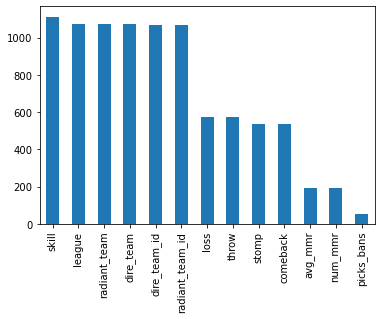

In [4]:
data_missing = dm_data.isnull().sum().sort_values(ascending=False)
data_missing = data_missing[data_missing > 0]

data_missing.plot.bar()

### Summary
- From this we can see that we're missing quite a bit of data, there's not too much to worry about here other than the avg_mmr which we found interesting earlier

In [5]:
data_missing = pd.concat([data_missing,data_missing/len(dm_data)], axis=1)
data_missing.rename({0:"Data Missing",
                    1:"Data Missing Percentage"}, axis='columns')

,Data Missing,Data Missing Percentage
skill,1111,1.000
league,1071,0.964
radiant_team,1071,0.964
dire_team,1071,0.964
dire_team_id,1066,0.959
radiant_team_id,1065,0.959
loss,573,0.516
throw,573,0.516
stomp,538,0.484
comeback,538,0.484


### Summary
- We're missing 17% of average mmr. That means if we want to check against mmr, we will lose 17% of 1111 which is 922 data points

## Analysis
### Preprocessing
Chatwheel conversion
Radiant player_slot goes 0-4 Dire player_slots between 128-132

In [6]:
match_to_chat = dm_data[['match_id','chat', 'chat_count']]
match_to_chat.sort_values(['chat_count'],ascending=False)

,match_id,chat,chat_count
276,6807778717,"[{'time': -245, 'type': 'chat', 'key': 'now we...",201
1103,6805386401,"[{'time': -17, 'type': 'chatwheel', 'key': '71...",197
483,6806876301,"[{'time': -11, 'type': 'chatwheel', 'key': '10...",195
526,6806387219,"[{'time': -10, 'type': 'chatwheel', 'key': '97...",193
503,6806629206,"[{'time': -73, 'type': 'chatwheel', 'key': '49...",183
...,...,...,...
471,6806593604,"[{'time': -61, 'type': 'chatwheel', 'key': '58...",0
475,6806073102,"[{'time': 1149, 'type': 'chatwheel', 'key': '7...",0
486,6806879500,"[{'time': 112, 'type': 'chatwheel', 'key': '71...",0
875,6805706510,"[{'time': 197, 'type': 'chatwheel', 'key': '57...",0


#### Splitting the chat into Dire Team and Radiant Team

In [7]:
errors = 0
r_data = []
d_data = []
for i in range(len(dm_data['chat'])): #For each game
    
    r_holder = []
    d_holder = []
    r_chatwheel_count = 0
    d_chatwheel_count = 0
    
    for a in range(len(dm_data['chat'][i])): #For each message in the game
        
        try:
            
            if(dm_data['chat'][i][a]['player_slot'] >=0 and dm_data['chat'][i][a]['player_slot'] <= 4):
                #Radiant
                r_holder.append(dm_data['chat'][i][a])
                if(dm_data['chat'][i][a]['type'] =='chatwheel'):
                    r_chatwheel_count = r_chatwheel_count + 1
                
            elif(dm_data['chat'][i][a]['player_slot'] >=128 and dm_data['chat'][i][a]['player_slot'] <= 132):
                #Dire
                d_holder.append(dm_data['chat'][i][a])
                if(dm_data['chat'][i][a]['type'] =='chatwheel'):
                    d_chatwheel_count = d_chatwheel_count + 1
                
        except:
            
            errors = errors + 1
            
    r_data.append([dm_data['match_id'][i], r_holder, len(r_holder),r_chatwheel_count,len(r_holder)-r_chatwheel_count, dm_data['radiant_win'][i], dm_data['duration'][i]])
    d_data.append([dm_data['match_id'][i], d_holder, len(d_holder),d_chatwheel_count,len(d_holder)-d_chatwheel_count, ~dm_data['radiant_win'][i],dm_data['duration'][i]])

r_data = pd.DataFrame(r_data)
r_data.columns=["match_id","chat","num_all_messages","num_chatwheel_messages","num_ingame_messages","win", "duration"]
d_data = pd.DataFrame(d_data)
d_data.columns=["match_id","chat","num_all_messages","num_chatwheel_messages","num_ingame_messages","win", "duration"]
print(errors, "errors")
print("Radiant: ",len(r_data),"Dire: ", len(d_data))

14 errors
Radiant:  1111 Dire:  1111


- We've now split each game in two. All the chat on the dire team is under d_data and all chat on the radiant team is under r_data.

In [8]:
r_data.sort_values(['num_all_messages'],ascending=False)

,match_id,chat,num_all_messages,num_chatwheel_messages,num_ingame_messages,win,duration
497,6806886919,"[{'time': -55, 'type': 'chatwheel', 'key': '97...",435,387,48,False,2901
276,6807778717,"[{'time': -245, 'type': 'chat', 'key': 'now we...",271,119,152,False,2977
483,6806876301,"[{'time': 11, 'type': 'chatwheel', 'key': '71'...",192,105,87,True,3191
894,6804795105,"[{'time': -79, 'type': 'chatwheel', 'key': '10...",182,174,8,False,3216
526,6806387219,"[{'time': -10, 'type': 'chatwheel', 'key': '97...",180,103,77,False,4079
...,...,...,...,...,...,...,...
961,6805733019,[],0,0,0,False,415
849,6805303801,[],0,0,0,False,2131
787,6805414612,[],0,0,0,False,1851
962,6805733115,[],0,0,0,True,409


In [9]:
d_data.sort_values(['num_all_messages'],ascending=False)

,match_id,chat,num_all_messages,num_chatwheel_messages,num_ingame_messages,win,duration
1106,6804863704,"[{'time': -82, 'type': 'chatwheel', 'key': '47...",379,379,0,False,4174
503,6806629206,"[{'time': -73, 'type': 'chatwheel', 'key': '49...",219,70,149,False,2662
564,6806418210,"[{'time': -214, 'type': 'chat', 'key': 'GO MID...",216,152,64,False,3311
359,6808618618,"[{'time': -158, 'type': 'chatwheel', 'key': '5...",196,183,13,True,2263
670,6806023704,"[{'time': -86, 'type': 'chatwheel', 'key': '14...",195,177,18,True,2481
...,...,...,...,...,...,...,...
489,6806357517,[],0,0,0,False,2557
55,6808694807,[],0,0,0,True,3002
27,6807625418,[],0,0,0,True,416
1049,6805237710,[],0,0,0,True,1992


- We want to have a look at the distribution between the amount of messages per team 

<AxesSubplot:xlabel='num_all_messages', ylabel='Density'>

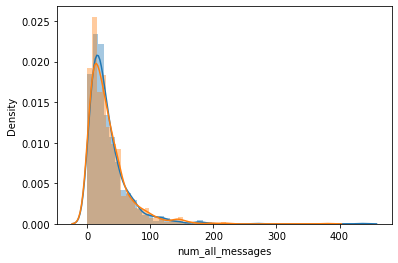

In [10]:
sns.distplot(r_data['num_all_messages'])
sns.distplot(d_data['num_all_messages'])

- We can see from the distribution that most games are between 0 and 50 messages.
- Next we want to see the same thing but for just chatwheel messages

<AxesSubplot:xlabel='num_chatwheel_messages', ylabel='Density'>

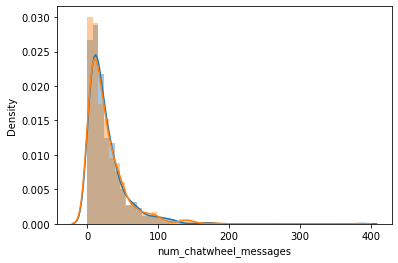

In [11]:
sns.distplot(r_data['num_chatwheel_messages'])
sns.distplot(d_data['num_chatwheel_messages'])

- As we expected the distribution is extremely similar to the above.
- Finally we want to see the distribution for ingame messages.

<AxesSubplot:xlabel='num_ingame_messages', ylabel='Density'>

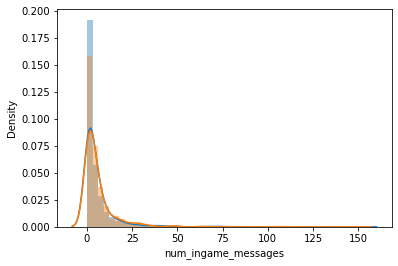

In [12]:
sns.distplot(r_data['num_ingame_messages'])
sns.distplot(d_data['num_ingame_messages'])

- Interestingly we can see that in these games people speak less than they use the chatwheels. This could be for numerous reasons such as using voice chat instead or playing solo and not wanting to communicate with the team.
- Finally we want to see the distribution of the duration of the games. We expect this to be a normal distribution

<AxesSubplot:xlabel='duration', ylabel='Density'>

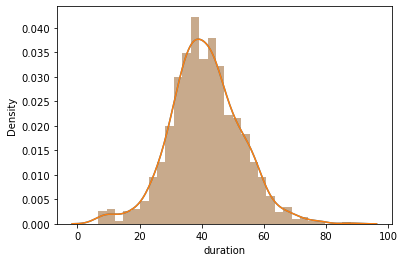

In [34]:
sns.distplot(r_data['duration']/60)
sns.distplot(d_data['duration']/60)

### Radiant Chat to Win
- We now want to see if we can visually see if the amount of communication has an effect on the winrate

#### All Chat

[Text(0.5, 0, 'Radiant Win'),
 Text(0, 0.5, 'Number of Messages'),
 Text(0.5, 1.0, 'Radiant')]

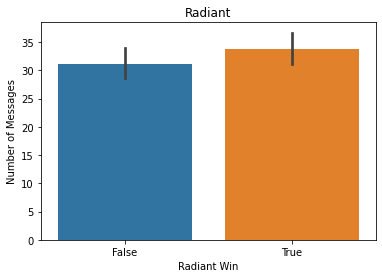

In [14]:
ax = sns.barplot(data=r_data, y="num_all_messages", x="win")
ax.set(xlabel='Radiant Win', ylabel='Number of Messages', title='Radiant')

- We can see a very slight difference between chatting and winrate, however I would argue this is not significant enough to conclude that chatting increases winrate.

#### Chatwheel

[Text(0.5, 0, 'Radiant Win'),
 Text(0, 0.5, 'Number of Messages'),
 Text(0.5, 1.0, 'Radiant')]

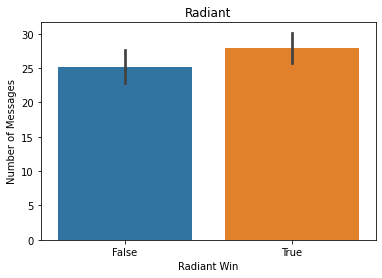

In [15]:
ax = sns.barplot(data=r_data, y="num_chatwheel_messages", x="win")
ax.set(xlabel='Radiant Win', ylabel='Number of Messages', title='Radiant')

#### In-game chat

[Text(0.5, 0, 'Radiant Win'),
 Text(0, 0.5, 'Number of Messages'),
 Text(0.5, 1.0, 'Radiant')]

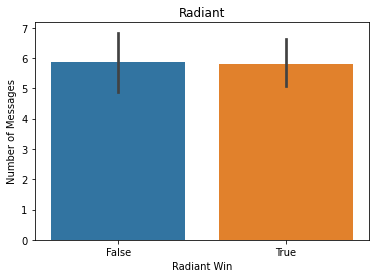

In [16]:
ax = sns.barplot(data=r_data, y="num_ingame_messages", x="win")
ax.set(xlabel='Radiant Win', ylabel='Number of Messages', title='Radiant')

- Interestingly there's no major difference in the amound of messages typed in chat and the winrate of the match

### Dire Chat to Win
- We now want to see if we can visually see if the amount of communication has an effect on the winrate

#### All Chat

[Text(0.5, 0, 'Dire Win'),
 Text(0, 0.5, 'Number of Messages'),
 Text(0.5, 1.0, 'Dire')]

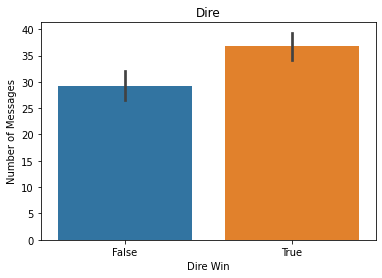

In [17]:
ax = sns.barplot(data=d_data, y="num_all_messages", x="win")
ax.set(xlabel='Dire Win', ylabel='Number of Messages', title='Dire')

- We can see there's a greater difference between chatting and winrate compared to the radiant counterpart.

#### Chatwheel

[Text(0.5, 0, 'Dire Win'),
 Text(0, 0.5, 'Number of Messages'),
 Text(0.5, 1.0, 'Dire')]

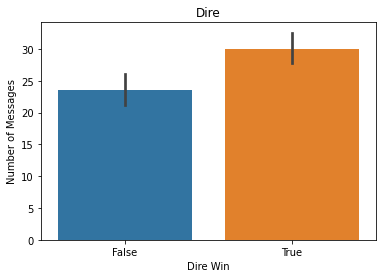

In [18]:
ax = sns.barplot(data=d_data, y="num_chatwheel_messages", x="win")
ax.set(xlabel='Dire Win', ylabel='Number of Messages', title='Dire')

#### In-game chat

[Text(0.5, 0, 'Dire Win'),
 Text(0, 0.5, 'Number of Messages'),
 Text(0.5, 1.0, 'Dire')]

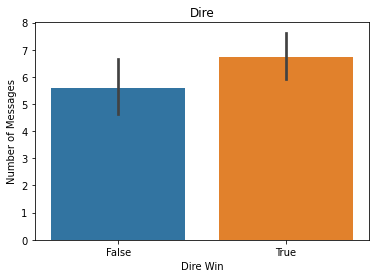

In [19]:
ax = sns.barplot(data=d_data, y="num_ingame_messages", x="win")
ax.set(xlabel='Dire Win', ylabel='Number of Messages', title='Dire')

- There seems to be a difference for the Dire team in communication and winrate. This could all be due to chance however

### Most used chatwheel function

- Let's find the top 10 most used chatwheel functions

In [20]:
chatwheel_values = []

for i in range(len(dm_data['chat'])):
    for a in range(len(dm_data['chat'][i])):
        if(dm_data['chat'][i][a]['type'] == 'chatwheel'):
            chatwheel_values.append(dm_data['chat'][i][a]['key'])
            
chatwheel_values = pd.DataFrame(chatwheel_values)
chatwheel_values.columns = {"key"}
chatwheel_values.groupby(['key'])['key'].count().reset_index(name='Count').sort_values(['Count'],ascending=False)[:10]

,key,Count
876,71,12034
861,7,5463
305,2,3291
912,76,2126
1,1,1177
821,62,1028
733,54,798
2,10,623
0,0,553
791,588,454


- 71:
- 7: Well played!
- 2: Get Back!
- 76: (All) Good game, well played
- 1: Careful!
- 62: Thanks!
- 54: Affirmative
- 10: Missing mid!
- 0: Okay.
- 588:
<br>

- The most used chatwheels seem to be quite polite and informative

#### Radiant: Most used chatwheel function 

In [21]:
r_chatwheel_values = []

for i in range(len(r_data['chat'])):
    for a in range(len(r_data['chat'][i])):
        if(r_data['chat'][i][a]['type'] == 'chatwheel'):
            r_chatwheel_values.append(r_data['chat'][i][a]['key'])
            
r_chatwheel_values = pd.DataFrame(r_chatwheel_values)
r_chatwheel_values.columns = {"key"}
r_chatwheel_values.groupby(['key'])['key'].count().reset_index(name='Count').sort_values(['Count'],ascending=False)[:10]

,key,Count
687,71,6134
674,7,2745
241,2,1566
717,76,946
1,1,559
641,62,489
566,54,411
2,10,370
0,0,291
59,11,245


- 11: Missing bottom!
<br>

#### Dire: Most used chatwheel function

In [22]:
d_chatwheel_values = []

for i in range(len(d_data['chat'])):
    for a in range(len(d_data['chat'][i])):
        if(d_data['chat'][i][a]['type'] == 'chatwheel'):
            d_chatwheel_values.append(d_data['chat'][i][a]['key'])
            
d_chatwheel_values = pd.DataFrame(d_chatwheel_values)
d_chatwheel_values.columns = {"key"}
d_chatwheel_values.groupby(['key'])['key'].count().reset_index(name='Count').sort_values(['Count'],ascending=False)[:10]

,key,Count
722,71,5900
709,7,2718
242,2,1725
747,76,1180
1,1,618
673,62,539
603,54,387
649,588,328
700,68,280
0,0,262


- 68: My bad

### Most used chatwheel function by wins

#### Radiant: Most used chatwheel function by wins 

In [23]:
r_chatwheel_values = []

for i in range(len(r_data[r_data['win'] ==True]['chat'])):
    for a in range(len(r_data['chat'][i])):
        if(r_data['chat'][i][a]['type'] == 'chatwheel'):
            r_chatwheel_values.append(r_data['chat'][i][a]['key'])
            
r_chatwheel_values = pd.DataFrame(r_chatwheel_values)
r_chatwheel_values.columns = {"key"}
r_chatwheel_values.groupby(['key'])['key'].count().reset_index(name='Count').sort_values(['Count'],ascending=False)[:10]

,key,Count
543,71,2812
533,7,1461
182,2,683
571,76,458
507,62,259
448,54,247
1,1,231
2,10,185
0,0,171
566,75,136


- 71:
- 7: Well played!
- 2: Get Back!
- 76: (All) Good game, well played
- 1: Careful!
- 62: Thanks!
- 54: Affirmative
- 10: Missing mid!
- 0: Okay.
- 75: (All) Good game

#### Dire: Most used chatwheel function by wins 

In [24]:
d_chatwheel_values = []

for i in range(len(d_data[d_data['win'] ==True]['chat'])):
    for a in range(len(d_data['chat'][i])):
        if(d_data['chat'][i][a]['type'] == 'chatwheel'):
            d_chatwheel_values.append(d_data['chat'][i][a]['key'])
            
d_chatwheel_values = pd.DataFrame(d_chatwheel_values)
d_chatwheel_values.columns = {"key"}
d_chatwheel_values.groupby(['key'])['key'].count().reset_index(name='Count').sort_values(['Count'],ascending=False)[:10]

,key,Count
569,71,2924
560,7,1437
192,2,890
594,76,600
1,1,349
529,62,325
471,54,234
553,68,198
0,0,184
383,450,130


- 71:
- 7: Well played!
- 2: Get Back!
- 76: (All) Good game, well played
- 1: Careful!
- 62: Thanks!
- 54: Affirmative
- 68: My bad
- 0: Okay.
- 450: 

### Chat distribution through time

#### All Chat through time

<AxesSubplot:ylabel='Density'>

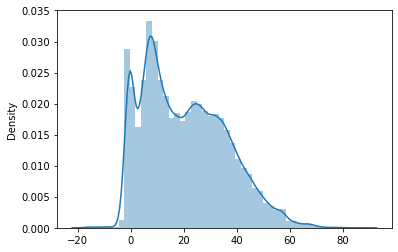

In [25]:
time = []

for i in range(len(dm_data['chat'])):
    for a in range(len(dm_data['chat'][i])):
        time.append(dm_data['chat'][i][a]['time'])

time = pd.DataFrame(time)
time.columns = {"duration"}
time.groupby(['duration'])['duration'].count().reset_index(name='Count')
time['duration'] = time['duration'].div(60)
sns.distplot(time)

#### Radiant Chat through time

<AxesSubplot:ylabel='Density'>

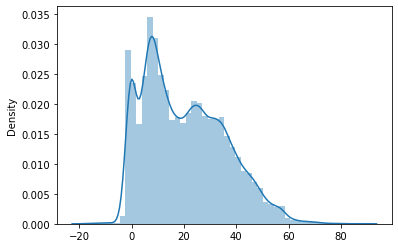

In [26]:
x = []

for i in range(len(r_data['chat'])):
    for a in range(len(r_data['chat'][i])):
        x.append(r_data['chat'][i][a]['time'])

x = pd.DataFrame(x)
x.columns = {"duration"}
x.groupby(['duration'])['duration'].count().reset_index(name='Count')
x['duration'] = x['duration'].div(60)
sns.distplot(x)

#### Dire Chat through time

<AxesSubplot:ylabel='Density'>

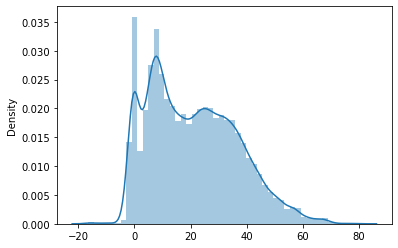

In [27]:
x = []

for i in range(len(d_data['chat'])):
    for a in range(len(d_data['chat'][i])):
        x.append(d_data['chat'][i][a]['time'])

x = pd.DataFrame(x)
x.columns = {"duration"}
x.groupby(['duration'])['duration'].count().reset_index(name='Count')
x['duration'] = x['duration'].div(60)
sns.distplot(x)

### Plot Chatwheel top 10 through time
- First we will plot all 10 together and then break them down to better understand when they're used

In [28]:
cw_time = []


for i in range(len(dm_data['chat'])):
    for a in range(len(dm_data['chat'][i])):
        if(dm_data['chat'][i][a]['type'] =='chatwheel'):
            cw_time.append([dm_data['chat'][i][a]['time'],dm_data['chat'][i][a]['key']])

cw_time = pd.DataFrame(cw_time)
cw_time.columns = {"duration","key"}
cw_time.groupby(['duration'])['duration'].count().reset_index(name='Count')
cw_time['duration'] = cw_time['duration'].div(60)

top_ten = cw_time.groupby(['key'])['key'].count().reset_index(name='Count').sort_values(['Count'],ascending=False)[:10]
cw_time_top_ten = cw_time[cw_time['key'].isin(top_ten['key'])]

In [29]:
cw_time_top_ten

,duration,key
1,0.933,1
2,2.350,10
3,4.317,7
4,6.100,71
5,6.100,71
...,...,...
59352,10.600,10
59353,16.350,71
59354,16.367,71
59357,23.150,7


In [30]:
top_ten = cw_time.groupby(['key'])['key'].count().reset_index(name='Count').sort_values(['Count'],ascending=False)[:10]
cw_time_top_ten = cw_time.groupby(['key','duration'])['key'].count().reset_index(name='Count').sort_values(['Count'],ascending=False)
cw_time_top_ten = cw_time_top_ten[cw_time_top_ten['key'].isin(top_ten['key'])]

In [31]:
parser_data = {'key':['71','54','7','2','76','10','588','62','1','0'], 'parse':['Unknown','Affirmative','Well played!','Get back!','(All) Good game, well played','Missing mid!','Unknown','Thanks!','Careful!','Okay.']}
parser = pd.DataFrame(data=parser_data)

cw_time_top_ten = pd.merge(cw_time_top_ten, parser, on=['key'])

- Essentially here we break down the chartwheel into its top 10 key uses and their times. This way we can see which ones are used and when they are used.

In [32]:
cw_time_top_ten

,key,duration,Count,parse
0,71,8.350,35,Unknown
1,71,6.200,35,Unknown
2,71,6.283,34,Unknown
3,71,8.300,33,Unknown
4,71,6.383,33,Unknown
...,...,...,...,...
11798,0,15.067,1,Okay.
11799,0,15.033,1,Okay.
11800,0,14.967,1,Okay.
11801,0,14.933,1,Okay.


#### Plot all chatwheel communication through time

<AxesSubplot:xlabel='duration', ylabel='Count'>

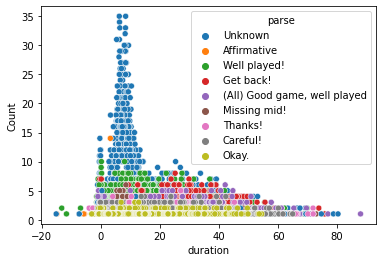

In [33]:
sns.scatterplot(x = cw_time_top_ten['duration'], y = cw_time_top_ten['Count'], hue=cw_time_top_ten['parse'])

- As we can see most chatwheel interactions occur at around 5-13 minutes of the game and slowly reduces the further on into the game you get